<a href="https://colab.research.google.com/github/solobala/ABD26/blob/main/MDS27_DZ7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Домашнее задание "Продвинутая оптимизация".

### Задание
При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

Постройте графики количества итераций (nit) оптимизации функции ackley от значения параметра.

Подробнее о результате выдачи тут.

In [2]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt


%matplotlib inline

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [ ]:
def get_draw(x,y,xlabel,ylabel,title):
  """
  Построение графика зависимости к-ва итераций (y) 
  от передаваемого параметра (x) 
  """
  fig, ax = plt.subplots(figsize=(8, 3))
  if xlabel=="Стратегии":
    ax.bar(x, y)
  else:  
    ax.plot(x, y)
  ax.tick_params(axis='x', rotation=70)

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(title)
  plt.show

In [ ]:
# Исходные данные
f_min =1000

strategies =['best1bin', 'best1exp', 'rand1exp','randtobest1exp', 
             'currenttobest1exp','best2exp','rand2exp','randtobest1bin', 
             'currenttobest1bin', 'best2bin','rand2bin', 'rand1bin']
popsize = 0
# Целочисленный множитель для установки общей численности популяции popsize * N   
# Это ключевое слово переопределяется, если начальное заполнение - 
# через ключевое слово init='sobol' .Тогда  Численность популяции рассчитывается как 
# следующая степень числа 2 после popsize * N             
mutations = np.arange(0., 1., 0.1)
# константа мутации. Обычно выбирается из  [0., 2.]

In [ ]:
researches = [] # Здесь будут все исследования
research = dict() # Кортеж для одного исследования, по порядку nit, strategy, popsize, mutation, fun
for strategy in strategies:
  for popsize in range (1,100,10):
    for mutation in mutations:
      try:
        result = differential_evolution(ackley, bounds, seed=42,popsize=popsize, strategy=strategy,mutation=mutation)
        if result.success:

          # Найдем минимальное значение целевой ф-ии и получим для нее значения остальных ключей
          # Далее все графики числа итераций будем строить для этих значений  параметров 
          # "strategy", "popsize", "mutation", фиксируя 2 из 3 значений 

          if result.fun < f_min:
            f_min = result.fun
            strategy_opt = strategy
            popsize_opt = popsize
            mutation_opt = mutation
            nit_opt = result.nit
          research = {"nit":result.nit,"strategy":strategy,"popsize": popsize, "mutation": mutation, "fun": result.fun}
          researches.append(research)
      except ValueError:
        pass

In [ ]:
print(f'Оптимальная стратегия: {strategy_opt}, К-т роста популяции: {popsize_opt}, Константа мутации: {mutation_opt}, Целевая ф-я: {f_min}, Кол-во итераций:{nit_opt}')

Оптимальная стратегия: best1bin, К-т роста популяции: 11, Константа мутации: 0.5, Целевая ф-я: 4.440892098500626e-16, Кол-во итераций:58


In [ ]:
# сохраним расчеты в файле
import json
with open(r"otus.txt", "w") as file:
    for  line in researches:
        stroka = json.dumps(line)
        file.write(stroka + '\n')

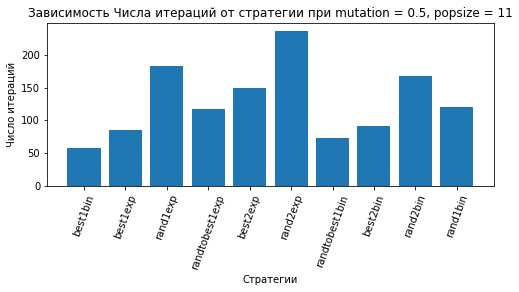

In [ ]:
# Получим данные для графика зависимости числа итераций от выбранной стратегии при условии popsize=popsize_opt и mutation=mutation_opt
y = [element["nit"] for element in researches if element["mutation"] == mutation_opt and element["popsize"] == popsize_opt]
x = [element["strategy"] for element in researches if element["mutation"] == mutation_opt and element["popsize"] == popsize_opt]
xlabel = 'Стратегии'
ylabel = 'Число итераций'
title = f'Зависимость Числа итераций от стратегии при mutation = {mutation_opt}, popsize = {popsize_opt}'

get_draw(x,y,xlabel,ylabel,title)

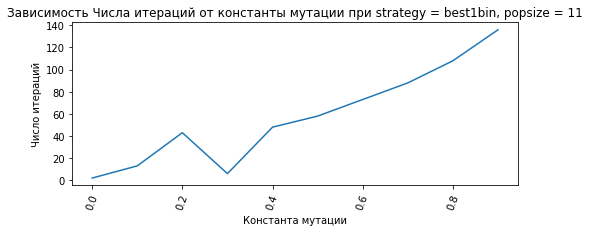

In [ ]:
# Получим данные для графика зависимости числа итераций от значения mutation при условии popsize=popsize_opt и strategy=strategy_opt
x = [element["mutation"] for element in researches if element["strategy"] == strategy_opt and element["popsize"] == popsize_opt]
y = [element["nit"] for element in researches if element["strategy"] == strategy_opt and element["popsize"] == popsize_opt]
xlabel = 'Константа мутации'
ylabel = 'Число итераций'
title = f'Зависимость Числа итераций от константы мутации при strategy = {strategy_opt}, popsize = {popsize_opt}'
get_draw(x,y,xlabel,ylabel,title)


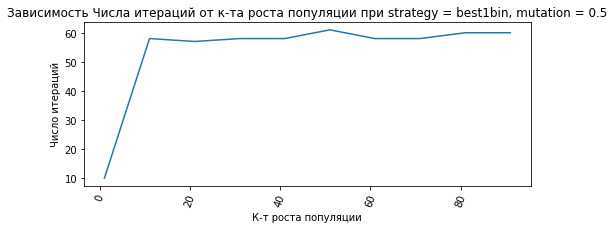

In [ ]:
# Получим данные для графика зависимости числа итераций от значения popsize при условии mutation=mutation_opt и strategy=strategy_opt

x = [element["popsize"] for element in researches if element["strategy"] == strategy_opt and element["mutation"] == mutation_opt]
y = [element["nit"] for element in researches if element["strategy"] == strategy_opt and element["mutation"] == mutation_opt]
xlabel = 'К-т роста популяции'
ylabel = 'Число итераций'
title = f'Зависимость Числа итераций от к-та роста популяции при strategy = {strategy_opt}, mutation = {mutation_opt}'
get_draw(x,y,xlabel,ylabel,title)

### Дополнительное задание
Поэкспериментируйте с параметрами и оптимизацией через minimize:

In [7]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead',options={'xtol':1e-8,'disp':True})
result_m

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 31
         Function evaluations: 63


 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [ 7.29128068e-09, -1.65075114e-09],
       [ 2.51112912e-09, -8.55170894e-09]]), array([4.44089210e-16, 2.11447895e-08, 2.52091259e-08]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 63
           nit: 31
        status: 0
       success: True
             x: array([0., 0.])

In [38]:
# Исходные данные
# Все методы, используемые в  minimize
methods =['Nelder-Mead','Powell', 'CG', 'BFGS','Newton-CG', 'L-BFGS-B', 'TNC',
             'COBYLA','SLSQP', 'trust-constr', 'dogleg', 'trust-ncg', 
             'trust-exact', 'trust-krylov']

# методы с установкой границ               
methods_with_bounds =['Nelder-Mead', 'Powell', 'L-BFGS-B', 'TNC',
             'SLSQP', 'trust-constr'] 
# методы с ограничениями              
methods_with_constraint =['COBYLA', 'SLSQP', 'trust-constr'] 


### методы с установкой границ

In [42]:
results = []
for method in methods_with_bounds:
  x0 = [0,0]
  result_m = minimize(ackley, x0,  method=method, options={'disp':True}) 
  if result_m.success:                      
    results.append({"metod": method, "nit": result_m.nit, "nfev": result_m.nfev,"x": result_m.x}) 
for result in results:
  print(result)
  print()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 17
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 63
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.605866716327455e-10
            Iterations: 5
            Function evaluations: 30
            Gradient evaluations: 5
`xtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 81, CG iterations: 26, optimality: 2.83e+00, constraint violation: 0.00e+00, execution time: 0.027 s.
{'metod': 'Nelder-Mead', 'nit': 8, 'nfev': 17, 'x': array([0., 0.])}

{'metod': 'Powell', 'nit': 1, 'nfev': 63, 'x': array([0., 0.])}

{'metod': 'SLSQP', 'nit': 5, 'nfev': 30, 'x': array([-9.01462031e-11, -9.01465365e-11])}

{'metod': 'trust-constr', 'nit': 27, 'nfev': 81, 'x': array([0., 0.])}



Вывод: По числу итераций и числу обращений  к целевой ф-ии лучшие результаты для тестовой ф-ии Ackley достигнуты при использовании метода Nelder-Mead. Результат не достигнут при использовании L-BFGS-B', 'TNC

In [31]:
results = []
for method in methods_with_constraint:
  
  x0 = [0,0]
  result_m = minimize(ackley, x0,  method=method,  options={'disp':True}) 
  if result_m.success:                      
    results.append({"metod": method,  "nfev": result_m.nfev,"x": result_m.x}) 
for result in results:
  print(result)
  print()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 3.605866716327455e-10
            Iterations: 5
            Function evaluations: 30
            Gradient evaluations: 5
`xtol` termination condition is satisfied.
Number of iterations: 27, function evaluations: 81, CG iterations: 26, optimality: 2.83e+00, constraint violation: 0.00e+00, execution time: 0.072 s.
{'metod': 'COBYLA', 'nfev': 25, 'x': array([-8.76258342e-06,  9.96153459e-05])}

{'metod': 'SLSQP', 'nfev': 30, 'x': array([-9.01462031e-11, -9.01465365e-11])}

{'metod': 'trust-constr', 'nfev': 81, 'x': array([0., 0.])}



In [44]:
x0 = [0,0]
result_m = minimize(ackley, x0,  method='COBYLA',  options={'disp':True}) 
result_m

     fun: 0.00028310899612238316
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 25
  status: 1
 success: True
       x: array([-8.76258342e-06,  9.96153459e-05])

'trust-constr'потребовал наибольшего числа итераций(27) и  обращений к ф-ии  (81()), но дал наиболее точный результат.'SLSQP' потребовал значительно меньше итераций (5) и обращений к ф-ии (30)

### Вы также можете поэкспериментировать с другими методами оптимизации, но это не обязательно для зачета.